129L Section 2 <br>
1/14-16/25 <br>
William Melby

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from mpl_toolkits.mplot3d import Axes3D

**Task 1**: Convex hull in 2D

Part 1: Build Algorithms

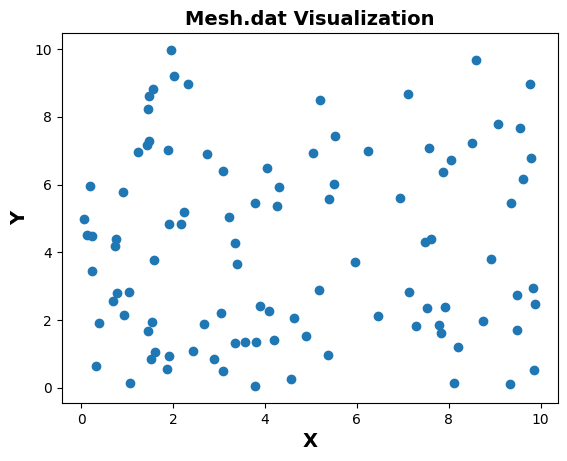

In [2]:
# Load the .dat file
data = pd.read_csv("mesh.dat", delimiter=" ")  # Adjust the delimiter based on file format

# Plot the data
plt.plot(data['X'], data['Y'], marker='o', linestyle=' ')
plt.xlabel("X", fontsize=14, fontweight='bold')
plt.ylabel("Y", fontsize=14, fontweight='bold')
plt.title("Mesh.dat Visualization", fontsize=14, fontweight='bold')
plt.show()

In [3]:
print(data)

           X         Y
0   7.886064  6.359793
1   2.321047  8.954139
2   0.241770  4.484384
3   8.585893  9.667951
4   0.733972  4.184429
..       ...       ...
95  2.225854  5.189698
96  3.088985  0.506305
97  0.907754  5.776031
98  5.203489  8.485519
99  3.223847  5.037382

[100 rows x 2 columns]


In [4]:
def get_cross_product(p1, p2, p3):
		return ((p2[0] - p1[0])*(p3[1] - p1[1])) - ((p2[1] - p1[1])*(p3[0] - p1[0]))

In [5]:
def get_slope(p1, p2):
    if p1[0] == p2[0]:
        return float('inf')
    else:
        return 1.0*(p1[1]-p2[1])/(p1[0]-p2[0])

In [6]:
def compute_convex_hull(points):
		hull = []
		points.sort(key=lambda x:[x[0],x[1]])
		start = points.pop(0)
		hull.append(start)
		points.sort(key=lambda p: (get_slope(p,start), -p[1],p[0]))
		for pt in points:
			hull.append(pt)
			while len(hull) > 2 and get_cross_product(hull[-3],hull[-2],hull[-1]) < 0:
				hull.pop(-2)
		return hull

Part 2

In [24]:
# generate an 2D point cloud with n points between 0<x,y<1
def generate_point_cloud(n):
    points = np.random.rand(n, 2)
    # x = np.random.rand(n)
    # y = np.random.rand(n)
    # return x, y
    return points

In [8]:
# part b. 
n = [10, 50, 100, 200, 400, 800, 1000]

# Task 2

In [10]:
from collections import Counter
from scipy.spatial import Delaunay
np.isclose

<function numpy.isclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)>

In [11]:
# Part a
def surface1(x, y):
    return 2*x**2+2*y**2

In [12]:
def surface2(x, y):
    return 2*np.exp(-x**2-y**2)

In [52]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
x, y = np.meshgrid(x, y)

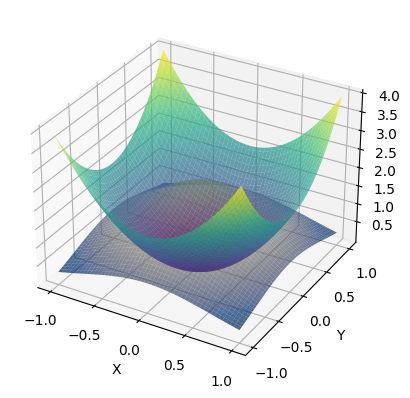

In [53]:
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.plot_surface(x, y, surface1(x, y), cmap='viridis', alpha=0.7)
ax.plot_surface(x, y, surface2(x, y), cmap='cividis', alpha=0.7)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

In [57]:
points = np.c_[x.ravel(), y.ravel()]
z1 = surface1(points[:, 0], points[:, 1])
print(points)

[[-1.         -1.        ]
 [-0.97979798 -1.        ]
 [-0.95959596 -1.        ]
 ...
 [ 0.95959596  1.        ]
 [ 0.97979798  1.        ]
 [ 1.          1.        ]]


In [55]:
# Part b
# points = generate_point_cloud(100)
# points = [x, y]
tri = Delaunay(points[:,:2])

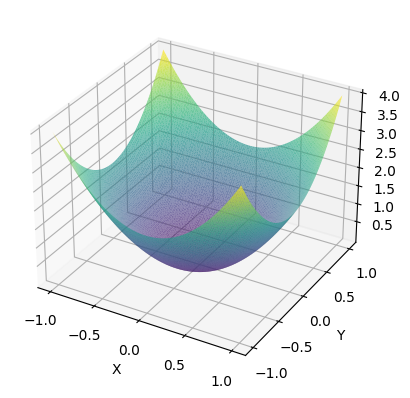

In [59]:
# Create a new figure
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the surface using the triangulation
ax.plot_trisurf(points[:, 0], points[:, 1], z1, triangles=tri.simplices, cmap='viridis', alpha=0.7)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()